<a href="https://colab.research.google.com/github/Rs-Biranchi/Micro-credit-project/blob/main/Project_Micro_credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data file.csv',parse_dates=['pdate'])
data

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


# Data-Preprocessing

### Exploratory data analysis

In [4]:
print("The Shape of dataset:",data.shape,'\n')
print("Information About the dataset:")
print(data.info(),'\n')
print('Statistical summary:\n',data.describe())

The Shape of dataset: (209593, 37) 

Information About the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Unnamed: 0            209593 non-null  int64         
 1   label                 209593 non-null  int64         
 2   msisdn                209593 non-null  object        
 3   aon                   209593 non-null  float64       
 4   daily_decr30          209593 non-null  float64       
 5   daily_decr90          209593 non-null  float64       
 6   rental30              209593 non-null  float64       
 7   rental90              209593 non-null  float64       
 8   last_rech_date_ma     209593 non-null  float64       
 9   last_rech_date_da     209593 non-null  float64       
 10  last_rech_amt_ma      209593 non-null  int64         
 11  cnt_ma_rech30         209593 non-null  int64     

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
#Feature "Unnamed: 0" and mobile number of user(i.e. msisdn)have no effect on target variable.
#so we drop these 2 columns
data.drop(['Unnamed: 0','msisdn'],axis=1,inplace=True)
data.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [6]:
#Checking featurewise nan values
data.isna().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

Uni & Bivariate Analysis

In [7]:
#label
data.label.value_counts()

1    183431
0     26162
Name: label, dtype: int64

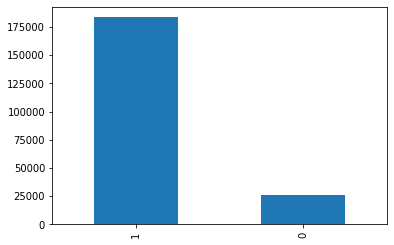

In [8]:
data.label.value_counts().plot.bar()

In [9]:
print('Percentage of Non-defaulter: ',round(len(data[data.label==1])/len(data.label),ndigits=3)*100,"%")
print('Percentage  of  Defaulter  : ',round(len(data[data.label==0])/len(data.label),ndigits=3)*100,"%")

Percentage of Non-defaulter:  87.5 %
Percentage  of  Defaulter  :  12.5 %


In [10]:
#telecom circle
data.pcircle.unique()

array(['UPW'], dtype=object)

For all the users telecom circle is same so presence of pcircle is adding no value to the model so we drop
pcircle

In [11]:
data.drop('pcircle',axis=1,inplace=True)

In [12]:
#date
df_dates=pd.DataFrame()
df_dates['Year']=data.pdate.dt.year
df_dates['Month']=data.pdate.dt.month_name()
df_dates['Day']=data.pdate.dt.day_name()
df_dates['label']=data.label
df_dates

,Year,Month,Day,label
0,2016,July,Wednesday,0
1,2016,August,Wednesday,1
2,2016,August,Friday,1
3,2016,June,Monday,1
4,2016,June,Wednesday,1
...,...,...,...,...
209588,2016,June,Friday,1
209589,2016,June,Sunday,1
209590,2016,July,Friday,1
209591,2016,July,Monday,1


In [13]:
print(df_dates.Year.unique(),'\n')
print(df_dates.Month.unique(),'\n')
print(df_dates.Day.unique(),'\n')

[2016] 

['July' 'August' 'June'] 

['Wednesday' 'Friday' 'Monday' 'Saturday' 'Tuesday' 'Sunday' 'Thursday'] 



It is the dataset for the month of June,July and August 2016

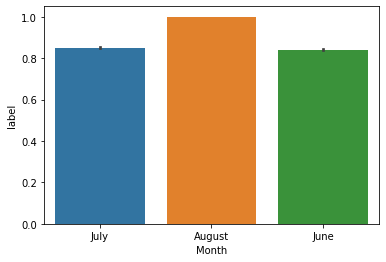

In [14]:
sns.barplot(x='Month',y='label',data=df_dates)
plt.show()

In [15]:
A=df_dates.groupby('Month')
june=A.get_group('June')
june

,Year,Month,Day,label
3,2016,June,Monday,1
4,2016,June,Wednesday,1
8,2016,June,Wednesday,1
9,2016,June,Wednesday,1
10,2016,June,Sunday,1
...,...,...,...,...
209576,2016,June,Wednesday,1
209583,2016,June,Thursday,1
209584,2016,June,Monday,0
209588,2016,June,Friday,1


1    69893
0    13261
Name: label, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


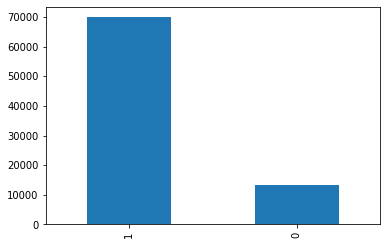

In [16]:
print(june.label.value_counts())
print(june.label.value_counts().plot.bar())

1    72864
0    12901
Name: label, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


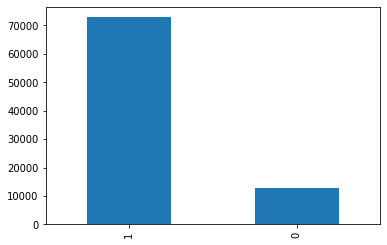

In [17]:
july=A.get_group('July')
print(july.label.value_counts())
print(july.label.value_counts().plot.bar())

1    40674
Name: label, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


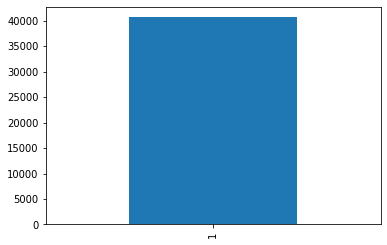

In [18]:
august=A.get_group('August')
print(august.label.value_counts())
print(august.label.value_counts().plot.bar())

In the month of August 2016 there are no defaulter. All the 40673 new users are non-defaulter

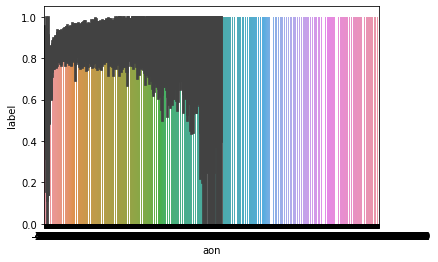

In [19]:
#aon
sns.barplot(x='aon',y='label',data=data)

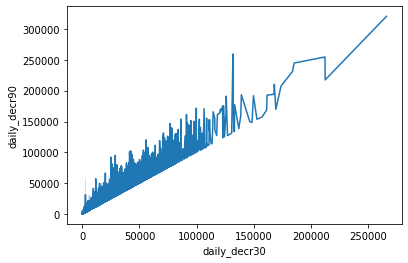

In [20]:
sns.lineplot(x='daily_decr30',y='daily_decr90',data=data)
plt.show()

Daily amount spent from main account, averaged over last 30 days is increasing with Daily amount spent from main account, averaged over last 90 days

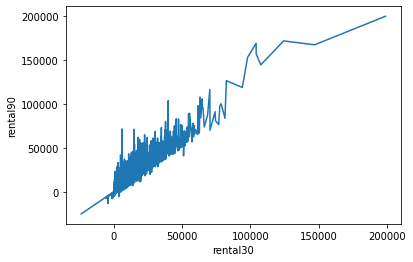

In [21]:
sns.lineplot(x='rental30',y='rental90',data=data)
plt.show()

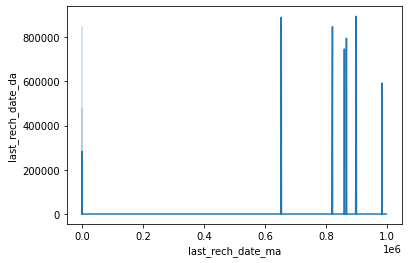

In [22]:
sns.lineplot(x='last_rech_date_ma',y='last_rech_date_da',data=data)
plt.show() 

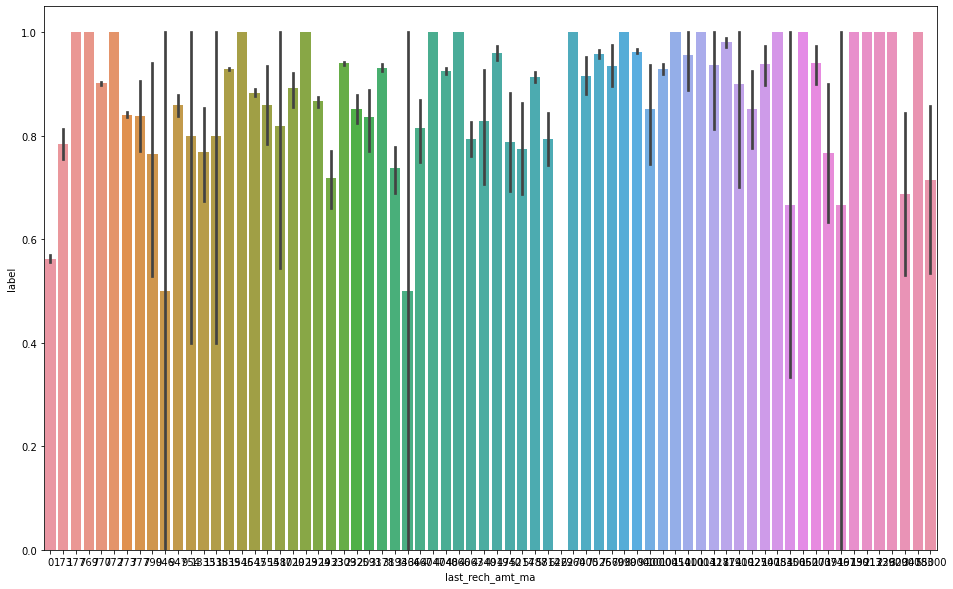

In [23]:
plt.figure(figsize=(16,10))
sns.barplot(x='last_rech_amt_ma',y='label',data=data)
plt.show()

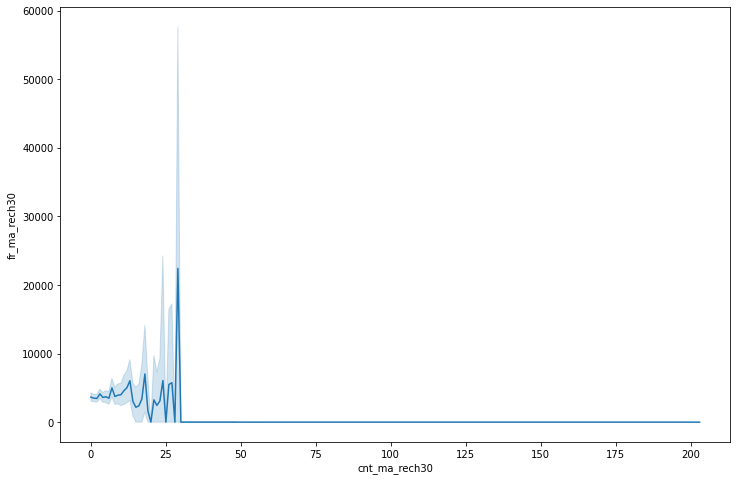

In [24]:
plt.figure(figsize=(12,8))
sns.lineplot(x='cnt_ma_rech30',y='fr_ma_rech30',data=data)
plt.show()

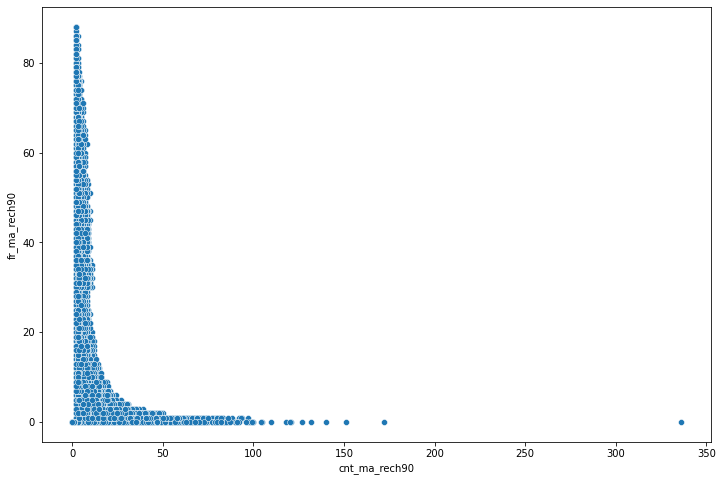

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='cnt_ma_rech90',y='fr_ma_rech90',data=data)
plt.show()

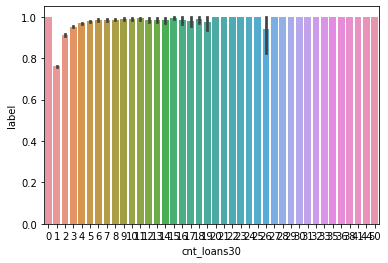

In [26]:
sns.barplot(x='cnt_loans30',y='label',data=data)
plt.show()

 More the Number of loans taken by user in last 30 days more is the succes ratio to pay the loan amount.

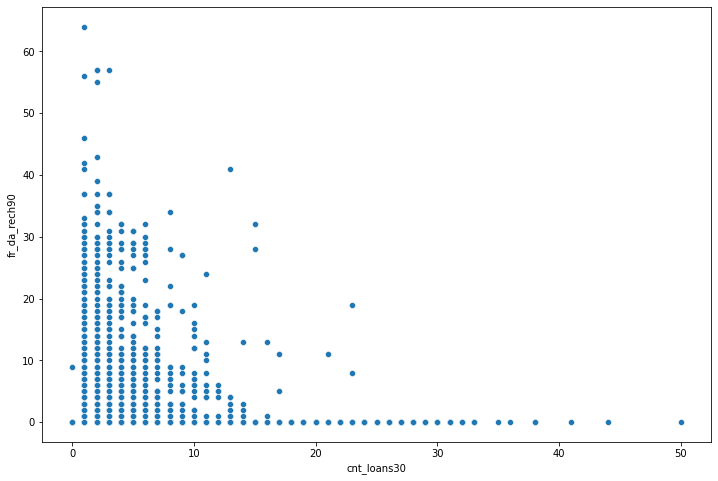

In [27]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='cnt_loans30',y='fr_da_rech90',data=data)
plt.show()

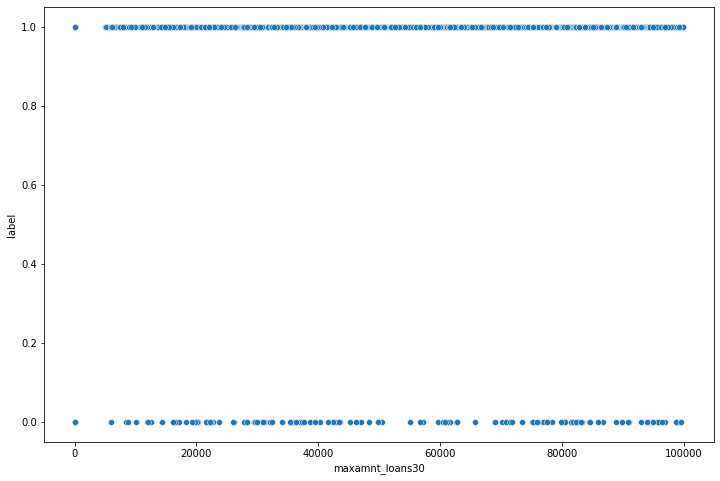

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='maxamnt_loans30',y='label',data=data)
plt.show()

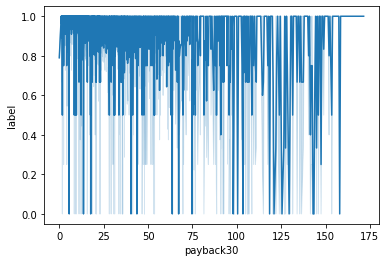

In [29]:
sns.lineplot(x='payback30',y='label',data=data)
plt.show()

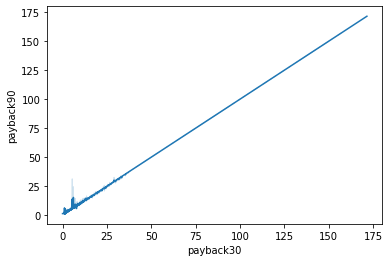

In [30]:
sns.lineplot(x='payback30',y='payback90',data=data)
plt.show()

Average payback time in days over last 30 days is directly propersional to Average payback time in days over last 90 days

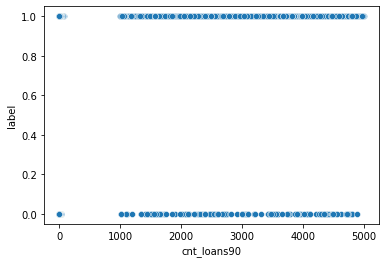

In [31]:
sns.scatterplot(x='cnt_loans90',y='label',data=data)
plt.show()

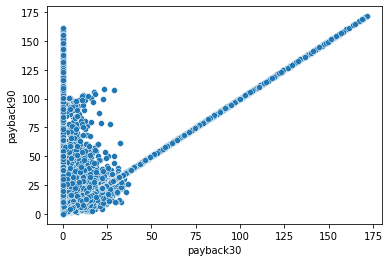

In [32]:
sns.scatterplot(x='payback30',y='payback90',data=data)
plt.show()

# Checking Correlation

In [33]:
data.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,0.001669,0.656986,-0.011792,0.000082,0.886433,-0.152759,0.584060,-0.051347,0.013463,0.002306,-0.002732,0.011981,0.006989,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


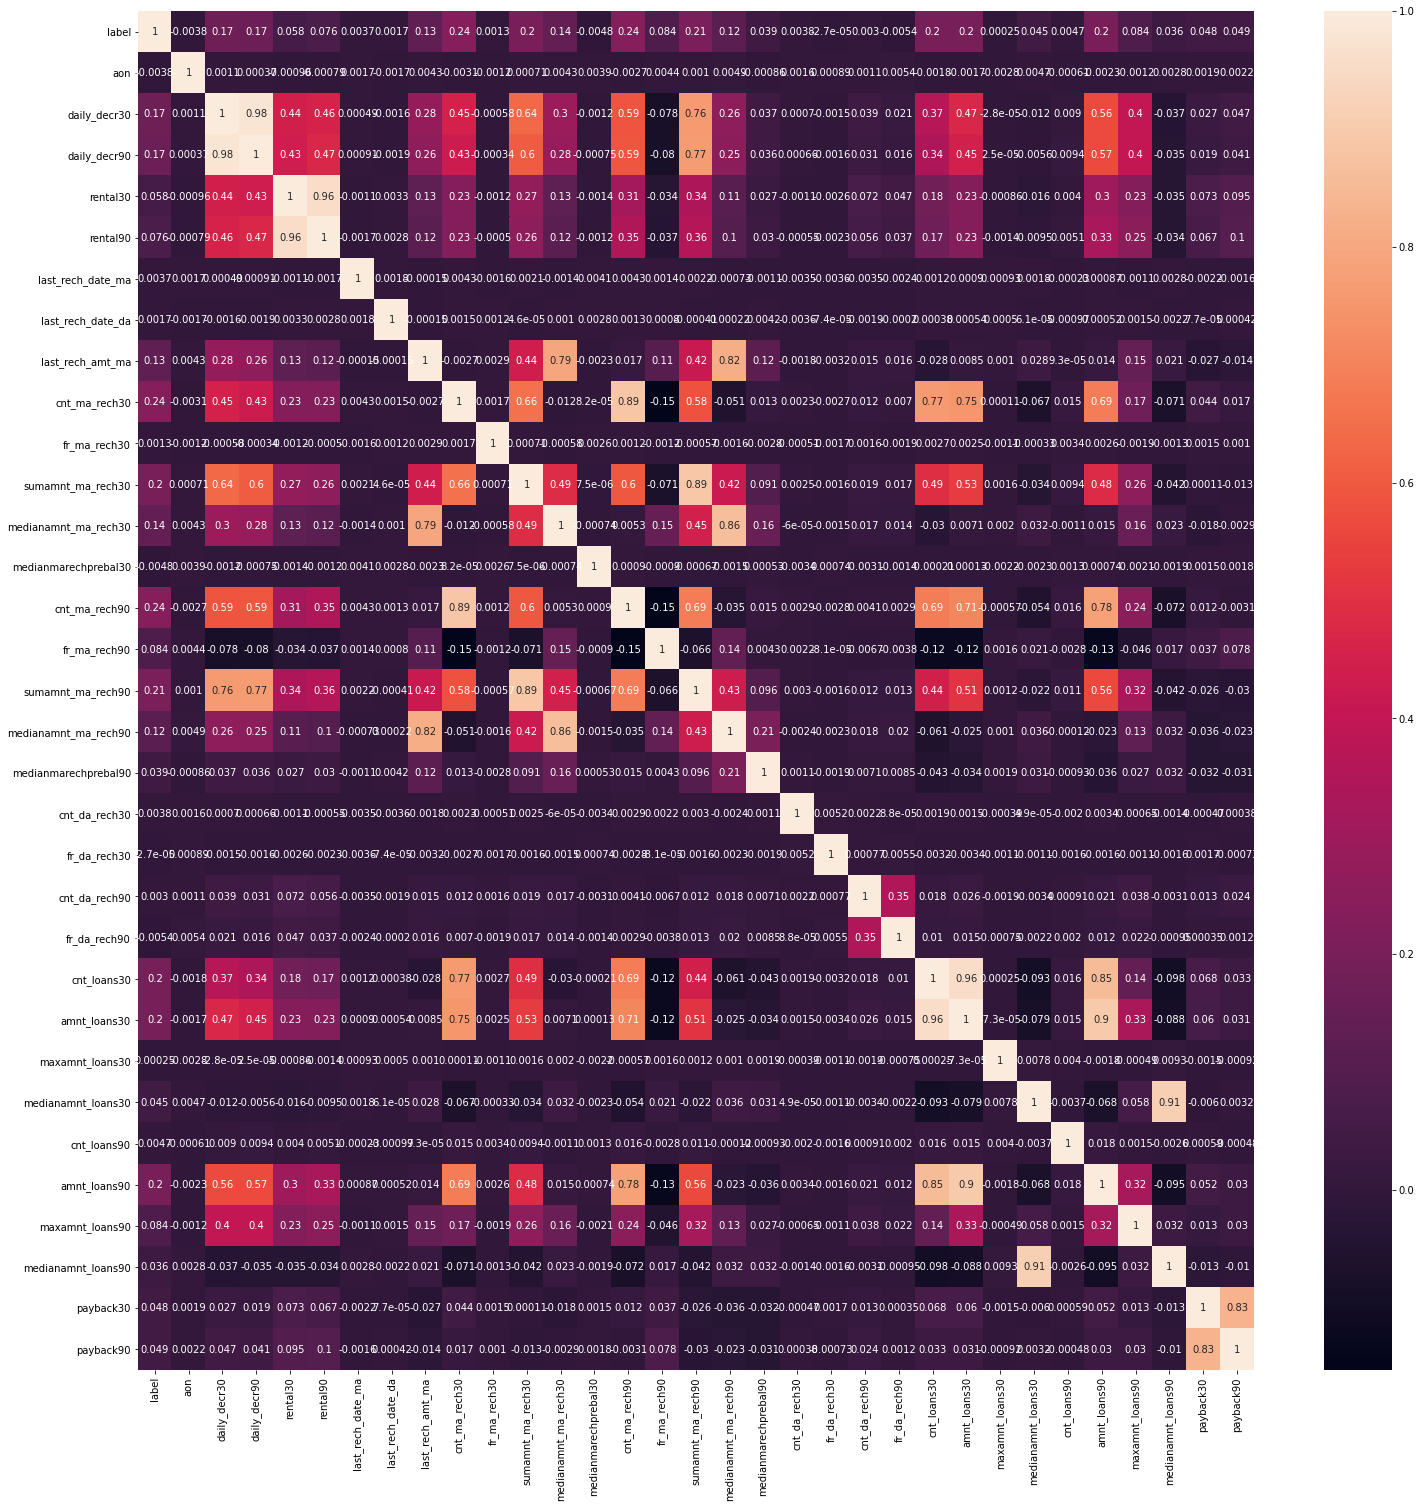

In [34]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True)

Daily_decr30 and Daily_decr90,rental30 and rental90,cnt_ma_rech30 and cnt_ma_rech90, sumamnt_ma_rech30 and sumamnt_ma_rech90, medianamnt_ma_rech30 and medianamnt_ma_rech90, amnt_loans30 and cnt_loans30, amnt_loans90 and cnt_loans30, amnt_loans30 and amnt_loans90,medianamnt_loans90 and medianamnt_loans30, payback90 and payback30 are very highly correlated with each other explaning same thing. So for decreaseing the computational cost we drop one of the highly correlated feature.

pdate also not required for model creation so we drop it.

In [35]:
data.drop(['daily_decr30','rental30','cnt_ma_rech30','sumamnt_ma_rech30','medianamnt_ma_rech30','amnt_loans30','cnt_loans30','medianamnt_loans30','payback30','pdate'],axis=1,inplace=True)
data.head()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90
0,0,272.0,3065.150000,260.13,2.0,0.0,1539,21.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,6.0,2.0,12,6,0.0,29.000000
1,1,712.0,12124.750000,3691.26,20.0,0.0,5787,0.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,12.0,1.0,12,12,0.0,0.000000
2,1,535.0,1398.000000,900.13,3.0,0.0,1539,0.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,6.0,1.0,6,6,0.0,0.000000
3,1,241.0,21.228000,159.42,41.0,0.0,947,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,6.0,2.0,12,6,0.0,0.000000
4,1,947.0,150.619333,1098.90,4.0,0.0,2309,2.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,6.0,7.0,42,6,0.0,2.333333


In [36]:
data.shape

(209593, 24)

In [37]:
#Splitting the dataset into training and testing sets.
x=data.drop('label',axis=1)
x

,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90
0,272.0,3065.150000,260.13,2.0,0.0,1539,21.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,6.0,2.0,12,6,0.0,29.000000
1,712.0,12124.750000,3691.26,20.0,0.0,5787,0.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,12.0,1.0,12,12,0.0,0.000000
2,535.0,1398.000000,900.13,3.0,0.0,1539,0.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,6.0,1.0,6,6,0.0,0.000000
3,241.0,21.228000,159.42,41.0,0.0,947,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,6.0,2.0,12,6,0.0,0.000000
4,947.0,150.619333,1098.90,4.0,0.0,2309,2.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,6.0,7.0,42,6,0.0,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,404.0,151.872333,1089.19,1.0,0.0,4048,2.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,6.0,2.0,12,6,0.0,1.000000
209589,1075.0,36.936000,1728.36,4.0,0.0,773,1.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,6.0,3.0,18,6,0.0,1.000000
209590,1013.0,11904.350000,8893.20,3.0,0.0,1539,8.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,12.0,6.0,54,12,0.0,3.833333
209591,1732.0,12574.370000,984.58,2.0,38.0,773,4.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,12.0,3.0,24,12,0.0,10.500000


In [38]:
Y=data.loc[:,'label'].values.reshape(-1,1)
Y

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [39]:
#Scaling the training set
sc=StandardScaler()
X=sc.fit_transform(x)
X=pd.DataFrame(X,columns=x.columns)
X

,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90
0,-0.103577,-0.276346,-0.558583,-0.069637,-0.069550,-0.221637,-0.069279,-0.071185,-0.599911,1.055043,-0.552756,-0.156410,-0.228933,-0.062759,-0.069583,-0.104375,-0.048048,-0.063284,-0.073493,-0.439950,-0.334212,-0.229594,2.394093
1,-0.097764,0.553380,0.036020,-0.069303,-0.069550,1.570178,-0.069670,-0.070194,-0.738926,-0.612919,-0.392058,1.884253,-0.083923,-0.062759,-0.069583,-0.104375,-0.048048,-0.061871,-0.077941,-0.439950,2.517690,-0.229594,-0.419233
2,-0.100102,-0.429033,-0.447674,-0.069619,-0.069550,-0.221637,-0.069670,-0.070096,-0.738926,-0.612919,-0.644049,-0.156410,-0.069622,-0.062759,-0.069583,-0.104375,-0.048048,-0.063284,-0.077941,-0.666624,-0.334212,-0.229594,-0.419233
3,-0.103986,-0.555125,-0.576036,-0.068914,-0.069550,-0.471344,-0.069670,-0.071324,-0.738926,-0.612919,-0.679166,-0.440797,-0.242476,-0.062759,-0.069583,-0.104375,-0.048048,-0.063284,-0.073493,-0.439950,-0.334212,-0.229594,-0.419233
4,-0.094660,-0.543274,-0.413227,-0.069600,-0.069550,0.103151,-0.069633,-0.070787,0.234181,-0.454065,0.658438,0.491625,-0.154451,-0.062759,-0.069583,-0.104375,-0.048048,-0.063284,-0.051250,0.693417,-0.334212,-0.229594,-0.192873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.101833,-0.543159,-0.414910,-0.069656,-0.069550,0.836664,-0.069633,-0.069624,-0.460896,-0.454065,-0.118178,0.630936,-0.000584,-0.062759,-0.069583,-0.104375,-0.048048,-0.063284,-0.073493,-0.439950,-0.334212,-0.229594,-0.322221
209589,-0.092969,-0.553686,-0.304144,-0.069600,-0.069550,-0.544737,-0.069652,-0.068337,-0.043850,-0.454065,-0.495809,-0.524383,0.053558,-0.062759,-0.069583,-0.104375,-0.048048,-0.063284,-0.069044,-0.213277,-0.334212,-0.229594,-0.322221
209590,-0.093788,0.533194,0.937500,-0.069619,-0.069550,-0.221637,-0.069521,-0.070377,0.651227,-0.215785,0.367533,-0.156410,-0.121597,-0.062759,-0.069583,-0.104375,-0.048048,-0.061871,-0.055699,1.146764,2.517690,-0.229594,-0.047356
209591,-0.084289,0.594558,-0.433039,-0.069637,-0.068838,-0.544737,-0.069596,-0.068287,-0.043850,-0.295212,0.328916,0.262243,0.021598,-0.062759,-0.069583,2.411002,-0.048048,-0.061871,-0.069044,0.013396,2.517690,-0.229594,0.599385


In [40]:
#Checking the best random State
max_acc_scr=0
for r_state in range(42,101):
  X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=r_state)
  lr=LogisticRegression()
  lr.fit(X_train,Y_train)
  pred=lr.predict(X_test)
  acc_scr=accuracy_score(Y_test,pred)
  if acc_scr>max_acc_scr:
    max_acc_scr=acc_scr
    final_r_state=r_state
  print('Max accuracy score corresponding to ',final_r_state,' is ',max_acc_scr)

Max accuracy score corresponding to  42  is  0.8742962562422469
Max accuracy score corresponding to  43  is  0.8756639842234167
Max accuracy score corresponding to  43  is  0.8756639842234167
Max accuracy score corresponding to  43  is  0.8756639842234167
Max accuracy score corresponding to  43  is  0.8756639842234167
Max accuracy score corresponding to  43  is  0.8756639842234167
Max accuracy score corresponding to  43  is  0.8756639842234167
Max accuracy score corresponding to  43  is  0.8756639842234167
Max accuracy score corresponding to  50  is  0.8763637520277362
Max accuracy score corresponding to  51  is  0.8773815961067464
Max accuracy score corresponding to  51  is  0.8773815961067464
Max accuracy score corresponding to  51  is  0.8773815961067464
Max accuracy score corresponding to  51  is  0.8773815961067464
Max accuracy score corresponding to  51  is  0.8773815961067464
Max accuracy score corresponding to  51  is  0.8773815961067464
Max accuracy score corresponding to  51 

In [ ]:
#Accuracy score is maximum when the random_state is 74. So we take random_state 74 for final splitting

In [42]:
#Checking if the model is over or under fitting
a_score=cross_val_score(lr,X,Y,scoring='f1',cv=5)
print(a_score)
print(a_score.mean())

[0.9334539  0.9336712  0.93309038 0.93337918 0.93329937]
0.9333788059546825


In [43]:
A_score=cross_val_score(lr,X,Y,scoring='accuracy',cv=5)
print(A_score)
print(A_score.mean())

[0.87535485 0.87573654 0.87473461 0.87520874 0.8750656 ]
0.8752200685815271


In [44]:
#model is well fitted

In [45]:
#Final splitting
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,random_state=74,test_size=0.3)


model=[LogisticRegression(),KNeighborsClassifier(),SVC()]
for m in model:
  m.fit(train_X,train_Y)
  predm=m.predict(test_X)
  print("Accuracy Score of ",m, ' is :')
  print(accuracy_score(test_Y,predm))
  print("Confusion Matrix: \n",confusion_matrix(test_Y,predm))
  print("Classification Report: \n",classification_report(test_Y,predm))
  print("\n")

Accuracy Score of  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)  is :
0.877461115175419
Confusion Matrix: 
 [[   70  7639]
 [   66 55103]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.01      0.02      7709
           1       0.88      1.00      0.93     55169

    accuracy                           0.88     62878
   macro avg       0.70      0.50      0.48     62878
weighted avg       0.83      0.88      0.82     62878



Accuracy Score of  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')  is :
0.885826521199

In [46]:
model=[RandomForestClassifier(),GradientBoostingClassifier()]
for m in model:
  m.fit(train_X,train_Y)
  predm=m.predict(test_X)
  print("Accuracy Score of ",m, ' is :')
  print(accuracy_score(test_Y,predm))
  print("Confusion Matrix: \n",confusion_matrix(test_Y,predm))
  print("Classification Report: \n",classification_report(test_Y,predm))
  print("\n")

Accuracy Score of  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)  is :
0.9135627723528102
Confusion Matrix: 
 [[ 3316  4393]
 [ 1042 54127]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.43      0.55      7709
           1       0.92      0.98      0.95     55169

    accuracy                           0.91     62878
   macro avg       0.84      0.71      0.75     62878
weighted avg       0.90      0.91      0.90     62878



Accu

 Among the upper 5 models RandomForestClassifier performs best in terms of Accuracy Score,Precision,recall and F1 score. So we take the model as final model to classify the label.

In [49]:
rf=RandomForestClassifier()
params={'n_estimators':[100,200,300,400],'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=rf,param_grid=params,cv=5,scoring='accuracy')
gd_sr.fit(train_X,train_Y)
best_param=gd_sr.best_params_ 
print(best_param)
best_score=gd_sr.best_score_
print(best_score)

{'criterion': 'entropy', 'n_estimators': 400}
0.9111815424462393


In [50]:
#Final Model
rfc=RandomForestClassifier(n_estimators=400,criterion='entropy')
rfc.fit(train_X,train_Y)
pred_rfc=rfc.predict(test_X)
print("Accuracy Score : ",accuracy_score(test_Y,pred_rfc))
print("Confusion Matrix: \n",confusion_matrix(test_Y,pred_rfc))
print("Classification Report: \n",classification_report(test_Y,pred_rfc))

Accuracy Score :  0.9138013295588282
Confusion Matrix: 
 [[ 3291  4418]
 [ 1002 54167]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.43      0.55      7709
           1       0.92      0.98      0.95     55169

    accuracy                           0.91     62878
   macro avg       0.85      0.70      0.75     62878
weighted avg       0.91      0.91      0.90     62878



In [52]:
print('Prediction: ',pred_rfc)

Prediction:  [1 0 1 ... 1 1 1]


In [53]:
#Saving the prediction in a csv file
df=pd.DataFrame(pred_rfc)
df.to_csv('Micro_credit_prediction.csv')

#Saving the model
from sklearn.externals import joblib
joblib.dump(rfc,'Micro_credit_prediction_model.obj')

['Micro_credit_prediction_model.obj']